In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
path = os.getcwd() + '/final_data/vgsales.csv'
data = pd.read_csv(path, header=0)

del data['Rank']
del data['Name']
del data['Publisher']
del data['NA_Sales']
del data['EU_Sales']
del data['JP_Sales']
del data['Other_Sales']

target = data['Global_Sales']
del data['Global_Sales']

for t in range(len(target)):
    if target[t]> 10:
        target.at[t] = 9
    elif target[t]> 5:
       target.at[t]= 8
    elif target[t]>3:
       target.at[t]= 7
    elif target[t]>1:
       target.at[t]= 6
    elif target[t]>0.5:
       target.at[t]= 5
    elif target[t]>0.3:
       target.at[t]= 4
    elif target[t]>0.1:
       target.at[t]= 3
    elif target[t]>0.05:
       target.at[t]= 2
    elif target[t]>0.03:
       target.at[t]= 1
    elif target[t]>=0.01:
       target.at[t]= 0
print(target)

platforms = {}
for p in data['Platform']:
    if p in platforms.keys():
        pass
    else:
        platforms[p] = len(platforms)
print(platforms)

genres = {}
for g in data['Genre']:
    if g in genres.keys():
        g = genres[g]
    else:
        genres[g] = len(genres)
print(genres)

for i in range(data.shape[0]):
    data.at[i,'Platform'] = platforms[data['Platform'][i]]
    data.at[i, 'Genre'] = genres[data['Genre'][i]]
print(data)

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=.2, random_state=0)
print(x_test)

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
16431    0.0
16432    0.0
16433    0.0
16434    0.0
16435    0.0
Name: Global_Sales, Length: 16436, dtype: float64
{'Wii': 0, 'NES': 1, 'GB': 2, 'DS': 3, 'X360': 4, 'PS3': 5, 'PS2': 6, 'SNES': 7, 'GBA': 8, '3DS': 9, 'PS4': 10, 'N64': 11, 'PS': 12, 'XB': 13, 'PC': 14, '2600': 15, 'PSP': 16, 'XOne': 17, 'GC': 18, 'WiiU': 19, 'GEN': 20, 'DC': 21, 'PSV': 22, 'SAT': 23, 'SCD': 24, 'WS': 25, 'NG': 26, 'TG16': 27, '3DO': 28, 'GG': 29, 'PCFX': 30}
{'Sports': 0, 'Platform': 1, 'Racing': 2, 'Role-Playing': 3, 'Puzzle': 4, 'Misc': 5, 'Shooter': 6, 'Simulation': 7, 'Action': 8, 'Fighting': 9, 'Adventure': 10, 'Strategy': 11}
      Platform  Year Genre
0            0  2006     0
1            1  1985     1
2            0  2008     2
3            0  2009     0
4            2  1996     3
...        ...   ...   ...
16431        8  2002     1
16432       18  2003     6
16433        6  2008     2
16434        3  2010     4
1643

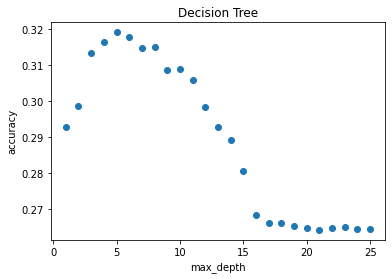

In [111]:
list_accuracy_dt = []
depth_dt = []
for i in range(1, 26):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(x_train, y_train)
    depth_dt = depth_dt + [i]
    list_accuracy_dt = list_accuracy_dt + [dtc.score(x_test, y_test)]
plt.scatter(x=depth_dt, y=list_accuracy_dt)
plt.title("Decision Tree")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.show()

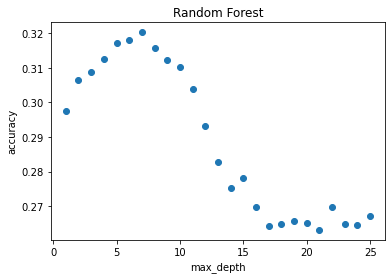

In [112]:
list_accuracy_rf = []
depth_rf = []
for i in range(1, 26):
    rfc = RandomForestClassifier(max_depth=i)
    rfc.fit(x_train, y_train)
    depth_rf = depth_rf + [i]
    list_accuracy_rf = list_accuracy_rf + [rfc.score(x_test, y_test)]
plt.scatter(x=depth_rf, y=list_accuracy_rf)
plt.title("Random Forest")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.show()